In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(
  rescale=1.0/255.0,
  rotation_range=20,
  width_shift_range=0.2,
  height_shift_range=0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip=True,
  fill_mode='nearest'
)

In [5]:
train_generator = train_datagen.flow_from_directory(
  './dataset/train',
  target_size=(128, 128),
  batch_size=32,
  class_mode='binary'  # For binary classification
)

Found 5216 images belonging to 2 classes.


In [6]:
test_generator = train_datagen.flow_from_directory(
  './dataset/test',
  target_size=(128, 128),
  batch_size=32,
  class_mode='binary'  # For binary classification
)

Found 624 images belonging to 2 classes.


In [7]:
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

In [8]:
val_generator = validation_datagen.flow_from_directory(
  './dataset/val',
  target_size=(128, 128),
  batch_size=32,
  class_mode='binary'  # For binary classification
)

Found 16 images belonging to 2 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [10]:
model = Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
  MaxPooling2D(2, 2),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Conv2D(128, (3, 3), activation='relu'),
  MaxPooling2D(2, 2),
  Flatten(),
  Dense(512, activation='relu'),
  Dropout(0.5),
  Dense(1, activation='sigmoid')  # Binary classification
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [12]:
from tensorflow.keras.optimizers.legacy import Adam

In [13]:
import PIL

In [14]:
model.compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [18]:
history = model.fit(
  train_generator,
  steps_per_epoch=len(train_generator),
  epochs=10,
  validation_data=val_generator,
  validation_steps=len(val_generator)
)

Epoch 1/10


2023-08-22 13:48:18.123320: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


163/163 [==============================] - 48s 292ms/step - loss: 0.2987 - accuracy: 0.8673 - val_loss: 0.3186 - val_accuracy: 0.8750
Epoch 2/10


2023-08-22 13:49:05.764208: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


163/163 [==============================] - 56s 341ms/step - loss: 0.2789 - accuracy: 0.8796 - val_loss: 0.3901 - val_accuracy: 0.8750
Epoch 3/10
163/163 [==============================] - 56s 340ms/step - loss: 0.2652 - accuracy: 0.8798 - val_loss: 0.4277 - val_accuracy: 0.8750
Epoch 4/10
163/163 [==============================] - 59s 362ms/step - loss: 0.2417 - accuracy: 0.8967 - val_loss: 0.4682 - val_accuracy: 0.8125
Epoch 5/10
163/163 [==============================] - 57s 349ms/step - loss: 0.2304 - accuracy: 0.9024 - val_loss: 0.3660 - val_accuracy: 0.8750
Epoch 6/10
163/163 [==============================] - 56s 346ms/step - loss: 0.2221 - accuracy: 0.9062 - val_loss: 0.4408 - val_accuracy: 0.8125
Epoch 7/10
163/163 [==============================] - 58s 352ms/step - loss: 0.2114 - accuracy: 0.9122 - val_loss: 0.3503 - val_accuracy: 0.7500
Epoch 8/10
163/163 [==============================] - 57s 352ms/step - loss: 0.1875 - accuracy: 0.9231 - val_loss: 1.1510 - val_accuracy: 0.6

In [19]:
loss, accuracy = model.evaluate(test_generator)

2023-08-22 13:57:49.136091: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


20/20 [==============================] - 5s 232ms/step - loss: 0.4662 - accuracy: 0.8285


In [21]:
print(loss, accuracy)

0.46615883708000183 0.8285256624221802


In [23]:
import matplotlib.pyplot as plt

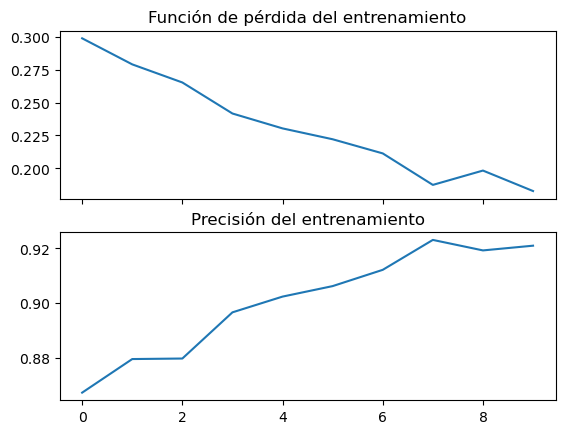

In [25]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['loss'])
ax1.set_title('Función de pérdida del entrenamiento')

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['accuracy'])
ax2.set_title('Precisión del entrenamiento')

plt.setp(ax1.get_xticklabels(), visible=False)
plt.show()

In [26]:
model.save('pneumonia_detection_model_v1.h5')